In [1]:
# %%capture
import numpy as np
import astropy.units as u
from astropy.units import Quantity
from astropy.coordinates import SkyCoord
from astropy.io import fits
from astropy.time import Time

import matplotlib.pyplot as plt
import matplotlib.pyplot as ply

from mhealpy import HealpixMap, HealpixBase
import pandas as pd
from pathlib import Path

from scoords import Attitude, SpacecraftFrame
from cosipy.response import FullDetectorResponse, ListModeResponse
from cosipy.spacecraftfile import SpacecraftFile
from cosipy import test_data
from cosipy.util import fetch_wasabi_file
from histpy import Histogram
import gc

from threeML import Model, Powerlaw

from cosipy.response import FullDetectorResponse

10:03:50 WARNING   The naima package is not available. Models that depend on it will not be         ]8;id=212276;file:///Users/penguin/miniconda3/envs/cosipy/lib/python3.10/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=820808;file:///Users/penguin/miniconda3/envs/cosipy/lib/python3.10/site-packages/astromodels/functions/functions_1D/functions.py#48\48]8;;\
                  available                                                                                        

         WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=911903;file:///Users/penguin/miniconda3/envs/cosipy/lib/python3.10/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=617105;file:///Users/penguin/miniconda3/envs/cosipy/lib/python3.10/site-packages/astromodels/functions/functions_1D/functions.py#69\69]8;;\
                  will not be available.                                                                           

/Users/penguin/miniconda3/envs/cosipy/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)


         WARNING   The ebltable package is not available. Models that depend on it will not be     ]8;id=943317;file:///Users/penguin/miniconda3/envs/cosipy/lib/python3.10/site-packages/astromodels/functions/functions_1D/absorption.py\absorption.py]8;;\:]8;id=873963;file:///Users/penguin/miniconda3/envs/cosipy/lib/python3.10/site-packages/astromodels/functions/functions_1D/absorption.py#33\33]8;;\
                  available                                                                                        

/Users/penguin/miniconda3/envs/cosipy/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)


10:03:50 INFO      Starting 3ML!                                                                     ]8;id=600926;file:///Users/penguin/miniconda3/envs/cosipy/lib/python3.10/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=885021;file:///Users/penguin/miniconda3/envs/cosipy/lib/python3.10/site-packages/threeML/__init__.py#35\35]8;;\

         WARNING   WARNINGs here are NOT errors                                                      ]8;id=680779;file:///Users/penguin/miniconda3/envs/cosipy/lib/python3.10/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=847681;file:///Users/penguin/miniconda3/envs/cosipy/lib/python3.10/site-packages/threeML/__init__.py#36\36]8;;\

         WARNING   but are inform you about optional packages that can be installed                  ]8;id=924653;file:///Users/penguin/miniconda3/envs/cosipy/lib/python3.10/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=85958;file:///Users/penguin/miniconda3/envs/cosipy/lib/python3.10/site-packages/threeML/__init__.py#37\37]8;;\

         WARNING    to disable these messages, turn off start_warning in your config file            ]8;id=181044;file:///Users/penguin/miniconda3/envs/cosipy/lib/python3.10/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=904351;file:///Users/penguin/miniconda3/envs/cosipy/lib/python3.10/site-packages/threeML/__init__.py#40\40]8;;\

         WARNING   ROOT minimizer not available                                                ]8;id=858132;file:///Users/penguin/miniconda3/envs/cosipy/lib/python3.10/site-packages/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=561417;file:///Users/penguin/miniconda3/envs/cosipy/lib/python3.10/site-packages/threeML/minimizer/minimization.py#1345\1345]8;;\

         WARNING   Multinest minimizer not available                                           ]8;id=572743;file:///Users/penguin/miniconda3/envs/cosipy/lib/python3.10/site-packages/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=475868;file:///Users/penguin/miniconda3/envs/cosipy/lib/python3.10/site-packages/threeML/minimizer/minimization.py#1357\1357]8;;\

         WARNING   PyGMO is not available                                                      ]8;id=658613;file:///Users/penguin/miniconda3/envs/cosipy/lib/python3.10/site-packages/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=781386;file:///Users/penguin/miniconda3/envs/cosipy/lib/python3.10/site-packages/threeML/minimizer/minimization.py#1369\1369]8;;\

10:03:51 WARNING   The cthreeML package is not installed. You will not be able to use plugins which  ]8;id=547017;file:///Users/penguin/miniconda3/envs/cosipy/lib/python3.10/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=330393;file:///Users/penguin/miniconda3/envs/cosipy/lib/python3.10/site-packages/threeML/__init__.py#94\94]8;;\
                  require the C/C++ interface (currently HAWC)                                                     

         WARNING   Could not import plugin HAWCLike.py. Do you have the relative instrument         ]8;id=488942;file:///Users/penguin/miniconda3/envs/cosipy/lib/python3.10/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=189638;file:///Users/penguin/miniconda3/envs/cosipy/lib/python3.10/site-packages/threeML/__init__.py#144\144]8;;\
                  software installed and configured?                                                               

         WARNING   Could not import plugin FermiLATLike.py. Do you have the relative instrument     ]8;id=730881;file:///Users/penguin/miniconda3/envs/cosipy/lib/python3.10/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=319851;file:///Users/penguin/miniconda3/envs/cosipy/lib/python3.10/site-packages/threeML/__init__.py#144\144]8;;\
                  software installed and configured?                                                               

10:03:51 WARNING   No fermitools installed                                              ]8;id=822847;file:///Users/penguin/miniconda3/envs/cosipy/lib/python3.10/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=307244;file:///Users/penguin/miniconda3/envs/cosipy/lib/python3.10/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py#44\44]8;;\

         WARNING   Env. variable OMP_NUM_THREADS is not set. Please set it to 1 for optimal         ]8;id=594137;file:///Users/penguin/miniconda3/envs/cosipy/lib/python3.10/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=248709;file:///Users/penguin/miniconda3/envs/cosipy/lib/python3.10/site-packages/threeML/__init__.py#387\387]8;;\
                  performances in 3ML                                                                              

         WARNING   Env. variable MKL_NUM_THREADS is not set. Please set it to 1 for optimal         ]8;id=902352;file:///Users/penguin/miniconda3/envs/cosipy/lib/python3.10/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=282003;file:///Users/penguin/miniconda3/envs/cosipy/lib/python3.10/site-packages/threeML/__init__.py#387\387]8;;\
                  performances in 3ML                                                                              

         WARNING   Env. variable NUMEXPR_NUM_THREADS is not set. Please set it to 1 for optimal     ]8;id=403318;file:///Users/penguin/miniconda3/envs/cosipy/lib/python3.10/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=5174;file:///Users/penguin/miniconda3/envs/cosipy/lib/python3.10/site-packages/threeML/__init__.py#387\387]8;;\
                  performances in 3ML                                                                              

In [ ]:
image_response = Histogram.open('transformed_response_example.h5')

KeyError: "Unable to synchronously open object (object 'hist' doesn't exist)"

### Creating example response file

In [4]:
from lmfit.lineshapes import gaussian

Ei = np.array([507, 509, 511, 513, 515])

R = np.zeros((5,5))
for i in np.arange(5):
    Z = gaussian(x=Ei[i], center=Ei)
    R[i, :] = np.round(Z / np.sum(Z), 2)

for i in range(1,4):
    R[i,i] -= 0.01

R[::-1, :]

array([[0.  , 0.  , 0.  , 0.12, 0.88],
       [0.  , 0.  , 0.11, 0.78, 0.11],
       [0.  , 0.11, 0.78, 0.11, 0.  ],
       [0.11, 0.78, 0.11, 0.  , 0.  ],
       [0.88, 0.12, 0.  , 0.  , 0.  ]])

In [17]:
h = Histogram([np.arange(4), np.arange(506, 517, 2), np.arange(506, 517, 2)], contents=np.stack([R, R, R]), labels=['NuLambda', 'Ei', 'Em'])
# h = Histogram([np.arange(506, 517, 2), np.arange(506, 517, 2)], contents=R, labels=['Ei', 'Em'])

for axis in h.axes:
    print(f"Axis {axis.label} has {axis.nbins} bins")

h.contents

Axis NuLambda has 3 bins
Axis Ei has 5 bins
Axis Em has 5 bins


array([[[0.88, 0.12, 0.  , 0.  , 0.  ],
        [0.11, 0.78, 0.11, 0.  , 0.  ],
        [0.  , 0.11, 0.78, 0.11, 0.  ],
        [0.  , 0.  , 0.11, 0.78, 0.11],
        [0.  , 0.  , 0.  , 0.12, 0.88]],

       [[0.88, 0.12, 0.  , 0.  , 0.  ],
        [0.11, 0.78, 0.11, 0.  , 0.  ],
        [0.  , 0.11, 0.78, 0.11, 0.  ],
        [0.  , 0.  , 0.11, 0.78, 0.11],
        [0.  , 0.  , 0.  , 0.12, 0.88]],

       [[0.88, 0.12, 0.  , 0.  , 0.  ],
        [0.11, 0.78, 0.11, 0.  , 0.  ],
        [0.  , 0.11, 0.78, 0.11, 0.  ],
        [0.  , 0.  , 0.11, 0.78, 0.11],
        [0.  , 0.  , 0.  , 0.12, 0.88]]])

(<Axes: xlabel='Ei', ylabel='Em'>,
 <matplotlib.collections.QuadMesh at 0x175a1c2b0>)

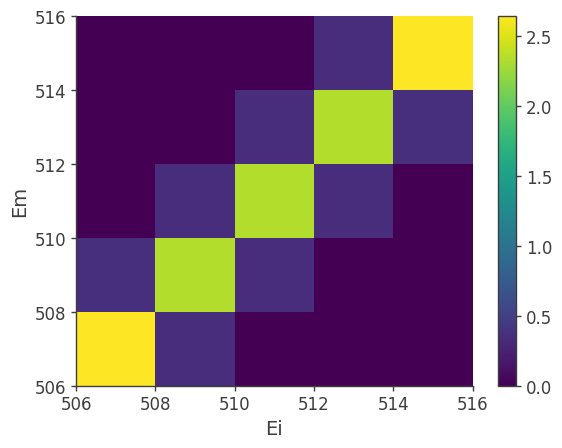

In [18]:
h.project('Ei', 'Em').draw()

In [2]:
with FullDetectorResponse.open('transformed_response_example.h5') as response:
    print(response['DRM'])

KeyError: "Unable to synchronously open attribute (can't locate attribute: 'UNIT')"

In [ ]:
f = h5py.File('response_example.h5', mode='w', track_order=True)
grp = f.create_group('DRM')

dset_contents = grp.create_dataset('CONTENTS', shape=(3,5,5), dtype=float)

In [ ]:
grp_axes = grp.create_group('AXES', track_order=True)

# 1 more than shape of contents dataset
dset_axis_NL = grp_axes.create_dataset('NuLambda', shape=4, dtype=float)
dset_axis_Ei = grp_axes.create_dataset('Ei', shape=6, dtype=float)
dset_axis_Em = grp_axes.create_dataset('Em', shape=6, dtype=float)

In [ ]:
dset_contents.name, hf['DRM/CONTENTS'].name

('/DRM/CONTENTS', '/DRM/CONTENTS')

In [ ]:
f['DRM/AXES/NuLambda'][:] = np.arange(4)
f['DRM/AXES/Ei'][:] = np.arange(506, 517, 2)
f['DRM/AXES/Em'][:] = np.arange(506, 517, 2)

for i in range(3):
    f['DRM/CONTENTS'][i, :, :] = R

In [ ]:
list(f['DRM/AXES'].keys())

['NuLambda', 'Ei', 'Em']

In [ ]:
f['DRM/CONTENTS'][:]

array([[[0.88, 0.12, 0.  , 0.  , 0.  ],
        [0.11, 0.78, 0.11, 0.  , 0.  ],
        [0.  , 0.11, 0.78, 0.11, 0.  ],
        [0.  , 0.  , 0.11, 0.78, 0.11],
        [0.  , 0.  , 0.  , 0.12, 0.88]],

       [[0.88, 0.12, 0.  , 0.  , 0.  ],
        [0.11, 0.78, 0.11, 0.  , 0.  ],
        [0.  , 0.11, 0.78, 0.11, 0.  ],
        [0.  , 0.  , 0.11, 0.78, 0.11],
        [0.  , 0.  , 0.  , 0.12, 0.88]],

       [[0.88, 0.12, 0.  , 0.  , 0.  ],
        [0.11, 0.78, 0.11, 0.  , 0.  ],
        [0.  , 0.11, 0.78, 0.11, 0.  ],
        [0.  , 0.  , 0.11, 0.78, 0.11],
        [0.  , 0.  , 0.  , 0.12, 0.88]]])

In [ ]:
f['DRM/AXES/Em'][:]

array([506., 508., 510., 512., 514., 516.])

In [ ]:
f.close()

In [ ]:
f = h5py.File('transformed_response_example.h5', mode='w', track_order=True)
grp = f.create_group('DRM')

dset_contents = grp.create_dataset('CONTENTS', shape=(3,5,5), dtype=float)
grp_axes = grp.create_group('AXES', track_order=True)

# 1 more than shape of contents dataset
dset_axis_NL = grp_axes.create_dataset('NuLambda', shape=4, dtype=float)
dset_axis_Ei = grp_axes.create_dataset('Ei', shape=6, dtype=float)
dset_axis_Em = grp_axes.create_dataset('Em', shape=6, dtype=float)

In [ ]:
e_col = np.linspace(-0.0075, 0.0075, 6)

In [ ]:
for i in range(5):
    Em = (e_col[i]+e_col[i+1])/2 * Ei + Ei
    print(Em)
    R[i, :] = gaussian(x=Em, center=Ei)

R /= np.sum(R, axis=0)
R = np.round(R, 2)
R[2, :4] = 0.6
R[2, 4] = 0.61
R[1:4:2, 4] = 0.185

R[::-1]

[503.958 505.946 507.934 509.922 511.91 ]
[505.479 507.473 509.467 511.461 513.455]
[507. 509. 511. 513. 515.]
[508.521 510.527 512.533 514.539 516.545]
[510.042 512.054 514.066 516.078 518.09 ]


array([[0.01 , 0.01 , 0.01 , 0.01 , 0.01 ],
       [0.19 , 0.19 , 0.19 , 0.19 , 0.185],
       [0.6  , 0.6  , 0.6  , 0.6  , 0.61 ],
       [0.19 , 0.19 , 0.19 , 0.19 , 0.185],
       [0.01 , 0.01 , 0.01 , 0.01 , 0.01 ]])

In [ ]:
f['DRM/AXES/NuLambda'][:] = np.arange(4)
f['DRM/AXES/Ei'][:] = np.arange(506, 517, 2)
f['DRM/AXES/Em'][:] = e_col

for i in range(3):
    f['DRM/CONTENTS'][i, :, :] = R

In [ ]:
f.close()